# Quantum Algorithms Assessment Part 2 Solutions with IBM Qiskit

In [22]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sqrt

# importing Qiskit
from qiskit.circuit.library.standard_gates import RZGate
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

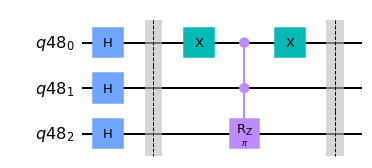

In [30]:
# Define the number of qubits
nqubits = 3

# Defining the Quantum Register 
qr = QuantumRegister(nqubits)

# Defining the Quantum Circuit 
grover_circuit = QuantumCircuit(qr)

# Applying Hadamard gate to all qubits to create superposition
for q in range(nqubits):
    grover_circuit.h(q)
    
grover_circuit.barrier()

# Making the Oracle circuit given in assessment test

# Applying the X Gate shown in  assessment circuit
grover_circuit.x(0)

# CCZ Implementation using RZ Gate with angle = pi (for Z gate)
r2cz = RZGate(pi).control(2)
grover_circuit.append(r2cz, qr)


# Applying the X Gate shown in assessment circuit
grover_circuit.x(0)
grover_circuit.barrier()

# Drawing the Oracle circuit
grover_circuit.draw('mpl')


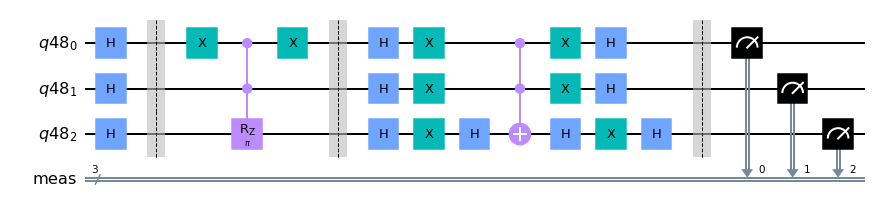

In [31]:
# Grover Diffusion Circuit Implementation

# First we apply Hadamards to all qubits
for qubit in range(nqubits):
    grover_circuit.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(nqubits):
    grover_circuit.x(qubit)
# Do multi-controlled-Z gate
grover_circuit.h(nqubits-1)
grover_circuit.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
grover_circuit.h(nqubits-1)
# Apply transformation |11..1> -> |00..0>
for qubit in range(nqubits):
    grover_circuit.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(nqubits):
    grover_circuit.h(qubit)

# Make a measurement
grover_circuit.measure_all()
grover_circuit.draw('mpl')

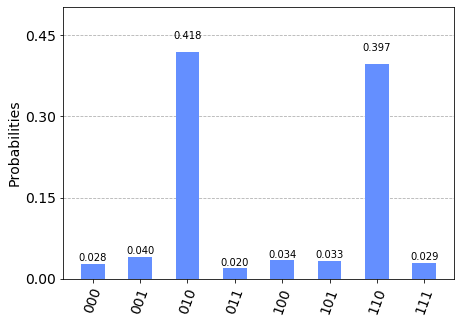

In [35]:
# Utilize the QASM simulator to run the quantum circuit and plot the probability measurements
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
qobj = assemble(transpiled_grover_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

There are 2 target states for this given oracle circuit - |011> and |010>. Also note that the ordering of qubits in Qiksit is q482 q481 q480, so we need to reverse it to get q480 q481 q482. The target states have been in mentioned in the reversed format. 

The probability of attaining these two target states |011> and |010> is 40% each one of them. 

The Grover's oracle and diffusion implementation with the grpahical results have been displayed above. Firstly, the superposition state is created using Hadamard gates. Then the Oracle circuit give in the assessment sheet is defined. The Grover's diffusion operator is defined for this circuit and then the measurement probabilitis in a graph are shown. 